In [19]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

plt.style.use(['science', 'retro', 'grid'])

import sys
import cvxopt as opt
sys.path.insert(0, os.path.abspath('../../src/rl/dir_vec/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/base'))
sys.path.insert(2, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(3, os.path.abspath('../../src/mpt/utils'))

In [275]:
import importlib
importlib.reload(sys.modules['EfficientFrontier'])
importlib.reload(sys.modules['GenerativeMarketEnv'])
importlib.reload(sys.modules['HarnessVec'])
importlib.reload(sys.modules['ParallelRunnerVec'])
importlib.reload(sys.modules['DirichletPolicyVec'])

<module 'DirichletPolicyVec' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/dir_vec/DirichletPolicyVec.py'>

In [276]:
from GenerativeMarketEnv import GenerativeMarketEnv
from DirichletPolicyVec import DirichletPolicyVec
from HarnessVec import HarnessVec
from ParallelRunnerVec import ParallelRunnerVec
from EfficientFrontier import EfficientFrontier
from MarketFactory import MarketFactory

In [34]:
μ = np.array([1, 3, 1])

Σ = np.array([[.1, 0, 0], [0, .1, 0], [0, 0, .1] ])

In [160]:
params_1 = {
    'n_assets': 3,
    'α': 0.8e-5,
    'α_end': 0.8e-5,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 1,
    'grad_adpt_mode': None,
    'returns_adpt_mode': None,
    'parameterisation': 'linear',
    'eps': 2000
}

params_2 = {
    'n_assets': 3,
    'α': 1.6e-5,
    'α_end': 1.6e-5,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.7,
    'grad_adpt_mode': None,
    'returns_adpt_mode': None,
    'parameterisation': 'linear',
    'eps': 2000
}


params_3 = {
    'n_assets': 3,
    'α': 1.9e-5,
    'α_end': 1.8e-5,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.4,
    'grad_adpt_mode': None,
    'returns_adpt_mode': None,
    'parameterisation': 'linear',
    'eps': 2000
}

params_4 = {
    'n_assets': 3,
    'α': 2.1e-5,
    'α_end': 1.8e-5,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': None,
    'returns_adpt_mode': None,
    'parameterisation': 'linear',
    'eps': 2000
}

legend_labels = {
    '0': r'$\gamma$: 1, \;\, $\alpha$: 0.8e-5', 
    '1': r'$\gamma$: 0.7, $\alpha$: 1.6e-5',
    '2': r'$\gamma$: 0.4, $\alpha$: 1.9e-5',
    '3': r'$\gamma$: 0.1, $\alpha$: 2.15e-5',
}

params = [params_1, params_2, params_3, params_4]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3108.73it/s]
1it [00:07,  7.11s/it]
100%|██████████| 10/10 [00:00<00:00, 8117.48it/s]
2it [00:14,  7.19s/it]
100%|██████████| 10/10 [00:00<00:00, 4179.26it/s]
3it [00:22,  7.30s/it]
100%|██████████| 10/10 [00:00<00:00, 2086.30it/s]
4it [00:29,  7.38s/it]


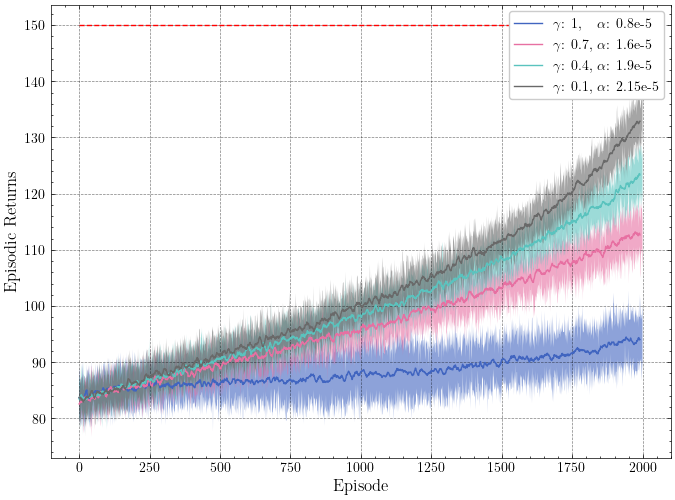

In [161]:
p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10, file_name='linear_vary_gamma')

# Param

In [133]:
params_1 = {
    'n_assets': 3,
    'α': 2.1e-5,
    'α_end': 1.8e-5,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': None,
    'returns_adpt_mode': None,
    'parameterisation': 'linear',
    'eps': 2000
}

params_2 = {
    'n_assets': 3,
    'α': 3.2e-4,
    'α_end': 2.2e-4,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': None,
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 2000
}

params_3 = {
    'n_assets': 3,
    'α': 1.3e-6,
    'α_end': 1e-6,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': None,
    'returns_adpt_mode': None,
    'parameterisation': 'exp',
    'eps': 2000
}


legend_labels = {
    '0': r'linear', 
    '1': r'softplus',
    '2': r'exp',
}

legend_labels = {
    '0': r'$\phi$: \text{linear}, \;\; $\alpha$: 2.1e-5', 
    '1': r'$\phi$: \text{softplus}, $\alpha$: 3.2e-4',
    '2': r'$\phi$: \text{exp}, \;\;\;\;\;\, $\alpha$: 1.3e-6',
}

params = [params_1, params_2, params_3]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 4306.71it/s]
1it [00:08,  8.89s/it]
100%|██████████| 10/10 [00:00<00:00, 4380.47it/s]
2it [00:18,  9.14s/it]
100%|██████████| 10/10 [00:00<00:00, 4833.26it/s]
3it [00:26,  8.96s/it]


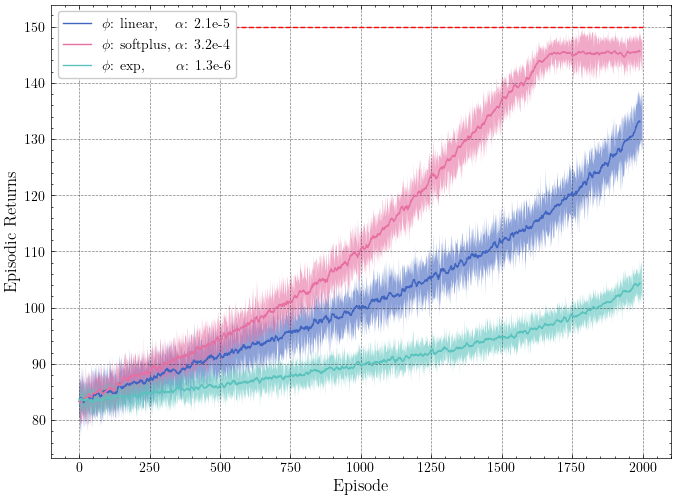

In [134]:
p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10, file_name='parameterisation')

# Instabilities

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3029.25it/s]
1it [00:09,  9.07s/it]


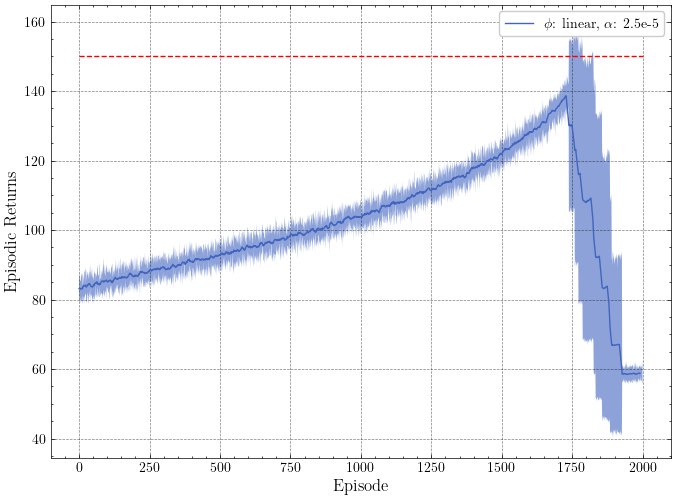

In [137]:
params_1 = {
    'n_assets': 3,
    'α': 2.5e-5,
    'α_end': 1.8e-5,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': None,
    'returns_adpt_mode': None,
    'parameterisation': 'linear',
    'eps': 2000
}

legend_labels = {
    '0': r'$\phi$: \text{linear}, $\alpha$: 2.5e-5'
}

params = [params_1]

p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10)
plt.savefig('./lin_unstable')

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3324.33it/s]
1it [00:08,  8.91s/it]


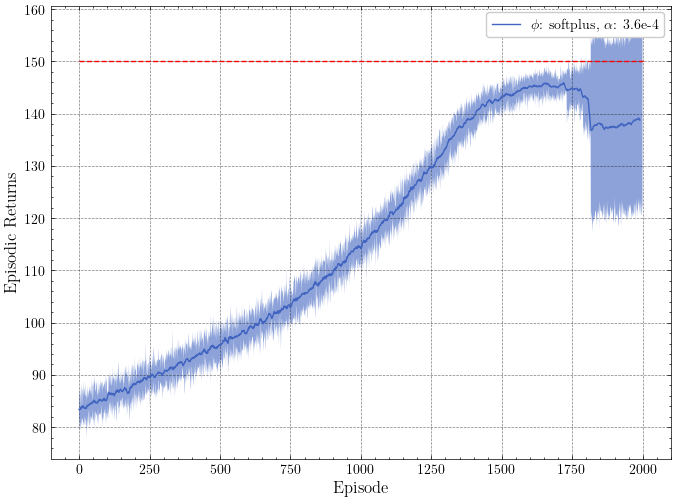

In [155]:
params_2 = {
    'n_assets': 3,
    'α': 3.6e-4,
    'α_end': 2.2e-4,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': None,
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 2000
}

legend_labels = {
    '0': r'$\phi$: \text{softplus}, $\alpha$: 3.6e-4'
}

params = [params_2]

p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10)
plt.savefig('./soft_unstable')

# Adaptive grads

In [339]:
params_1 = {
    'n_assets': 3,
    'α': 4e-3,
    'α_end': 4e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'max_digamma',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 2000
}



legend_labels = {
    '0': r'digamma,  $\alpha$: 4e-3'
}


params = [params_1]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 5229.81it/s]
1it [00:10, 10.35s/it]


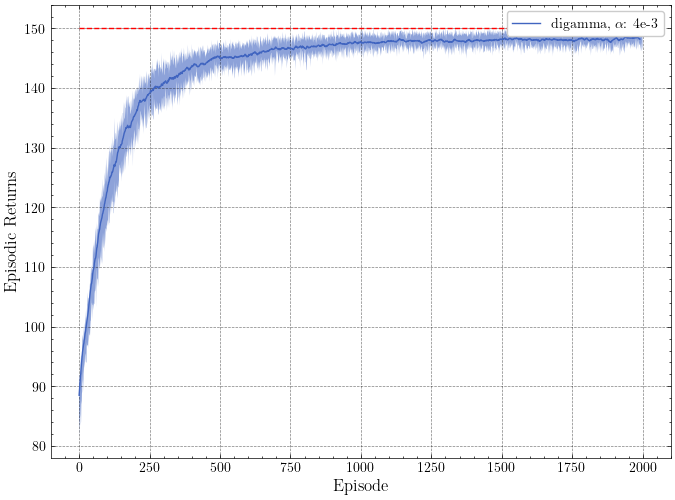

In [340]:
p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10, file_name='heuristic_di')
# p_runner.plot_av_rewards(window=10, file_name='heuristic_grad_adapt')

In [345]:
params_2 = {
    'n_assets': 3,
    'α': 5e-2,
    'α_end': 5e-2,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'max_polygamma',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 2000
}



legend_labels = {
    '0': r'polygamma,  $\alpha$: 5e-2',
}

params = [params_2]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3135.93it/s]
1it [00:15, 15.31s/it]


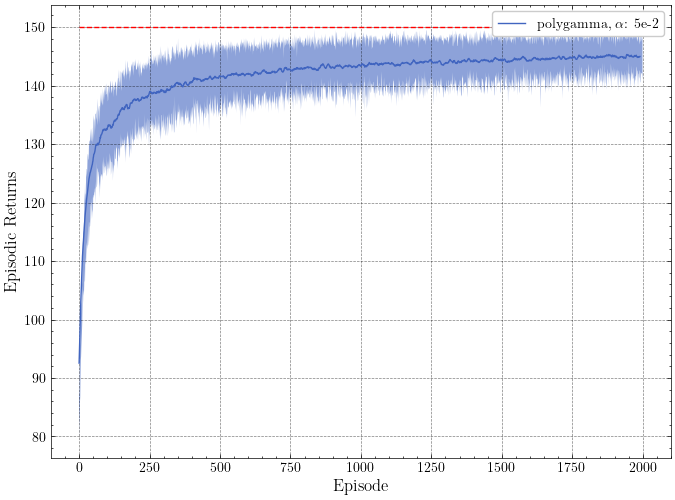

In [346]:
p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10, file_name='heuristic_poly')
# p_runner.plot_av_rewards(window=10, file_name='heuristic_grad_adapt')

In [343]:
params_3 = {
    'n_assets': 3,
    'α':2e-2,
    'α_end': 2e-2,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'max_di_polly_interpolation',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 2000
}

legend_labels = {
    '0': r'interpolation, $\alpha$: 2e-2',
}

params = [params_3]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 4457.76it/s]
1it [00:16, 16.96s/it]


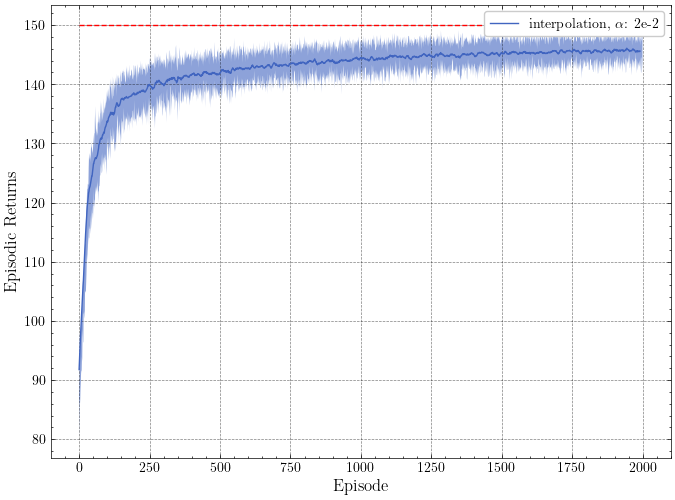

In [344]:
p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10, file_name='heuristic_inter')
# p_runner.plot_av_rewards(window=10, file_name='heuristic_grad_adapt')

# Baseline

## interpolation

In [480]:
params_1 = {
    'n_assets': 3,
    'α': 9e-2,
    'α_end': 9e-2,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'max_polygamma',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 2000
}


legend_labels = {'0': 'avg. rewards'}


params = [params_1]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 49.21it/s]
1it [00:18, 18.84s/it]


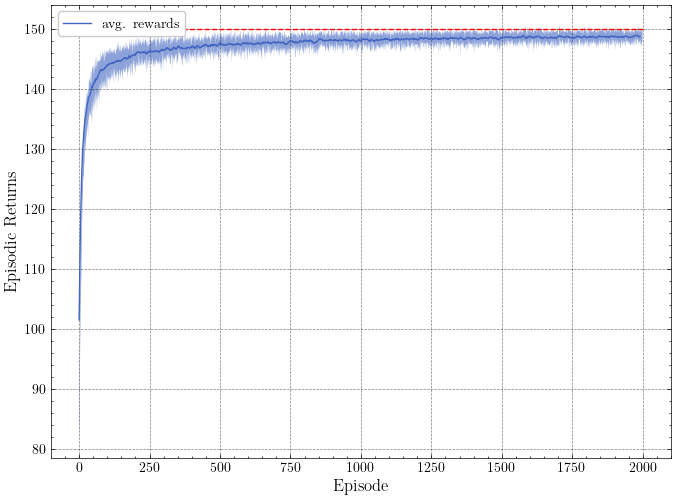

In [481]:
p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10)
plt.savefig('tri_w_baseline')

In [482]:
params_3 = {
    'n_assets': 3,
    'α': 20e-4,
    'α_end': 20e-4,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'max_polygamma',
    'returns_adpt_mode': 'noise_whitening',
    'parameterisation': 'softplus',
    'eps': 2000
}


legend_labels = {'0': 'noise whitening'}


params = [params_3]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 4716.94it/s]
1it [00:14, 14.73s/it]


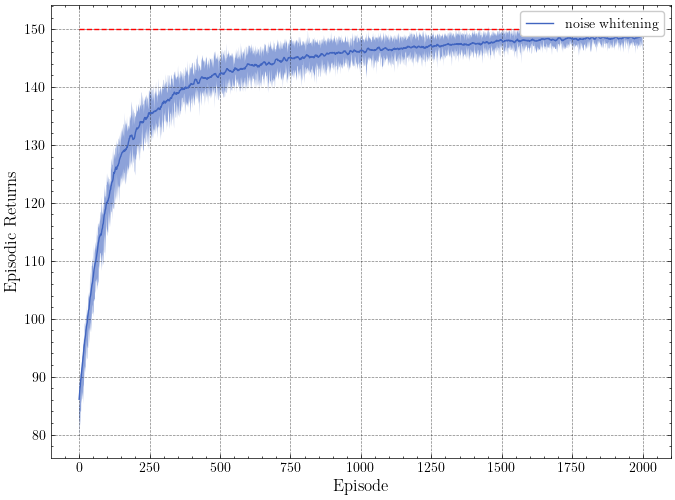

In [483]:
p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10)
plt.savefig('tri_w_nw')

## digamma

In [459]:
params_1 = {
    'n_assets': 3,
    'α': 9e-3,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'max_digamma',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 2000
}



legend_labels = {
    '0': r'avg. rewards'
}


params = [params_1]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 4076.49it/s]
1it [00:09,  9.72s/it]


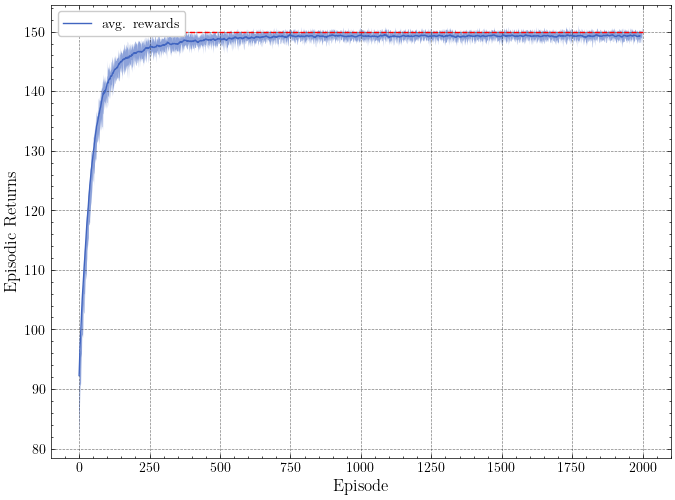

In [460]:
p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10)
plt.savefig('di_w_baseline')

# Natural Gradientsavefig

In [492]:
params_1 = {
    'n_assets': 3,
    'α': 5e-3,
    'α_end': 5e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'max_digamma',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 2000
}

# params_2 = {
#     'n_assets': 3,
#     'α':2e-2,
#     'α_end': 2e-2,
#     'start_ep': 1000, 
#     'α_decay_steps': 9999,
#     'γ': 0.1,
#     'grad_adpt_mode': 'natural_gradient',
#     'returns_adpt_mode': None,
#     'parameterisation': 'softplus',
#     'eps': 3000
# }

params_2 = {
    'n_assets': 3,
    'α':2.26e-1,
    'α_end': 2.25e-3,
    'start_ep': 1000, 
    'α_decay_steps': 1000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 2000
}


legend_labels = {'0': 'interpolation', '1': 'natural gradients'}

params = [params_2]

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 7038.60it/s]
1it [00:30, 30.71s/it]


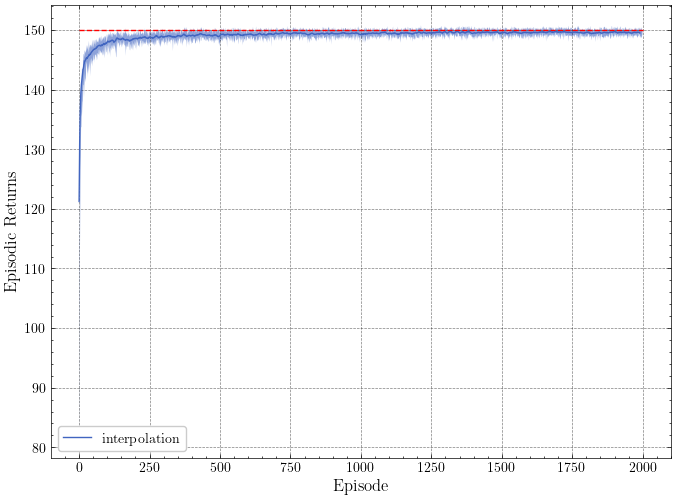

In [493]:
p_runner = ParallelRunnerVec(μ, Σ, 10, params, 50, legend_labels)
p_runner.run()
p_runner.plot_av_rewards(window=10)